# Pytorch Workflow

In [386]:
import torch
from torch import nn# nn contain all of the Pytorch building blocks
import matplotlib.pyplot as plt

torch.__version__

'2.8.0+cu126'

### 1.Data(Preparing and Loading)

---
using regression formula



In [387]:
# Create know parameter

weight=0.7
bias=0.3

#Create
start=0
end=1
step=0.02
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias

x[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# Splitting data into traing and test sets

In [388]:
#Create a train
train_split=int(0.8*len(x))
X_train,Y_train=x[:train_split],y[:train_split]
X_test,Y_test=x[train_split:],y[train_split:]
len(X_train),len(Y_train),len(X_test),len(Y_test)

(40, 40, 10, 10)

How might we better visualize our data

In [389]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_label=Y_test,
                     prediction=None):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
  plt.scatter(test_data,test_label,c="g",s=4,label="Testing data")
  if prediction is not None:
    plt.scatter(test_data,prediction,c="r",s=4,label="Prediction")
  plt.legend()

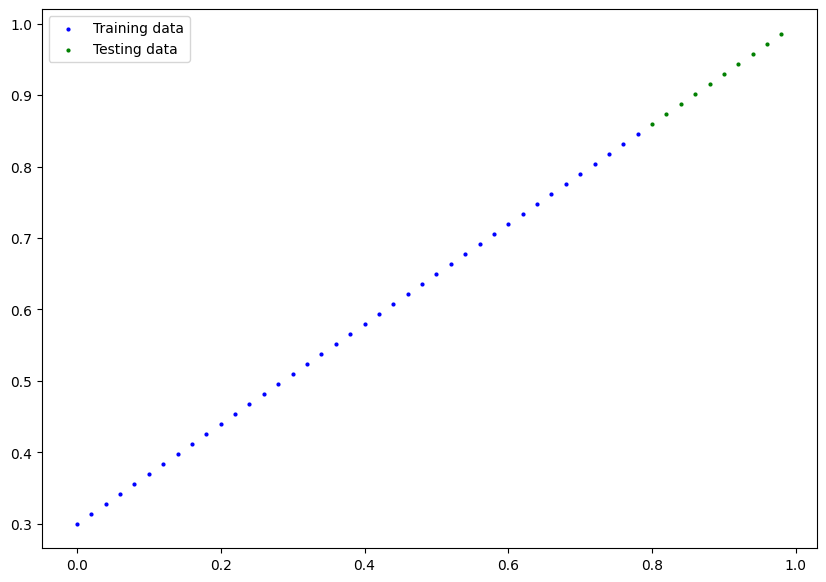

In [390]:
plot_predictions()

## Build Model
Our first pytorch model

What our model does:
* Start with random values(weight & bias)
* Look at training data and adjust the random values to better represt to the ideal values(the weight & bias values we  used to create the data)

How does it do so?
Two main algorithm:
1. Gradient Descent

2.Backpropagation

In [391]:
from torch import nn
# Create linear regression model class

class LinearRegressionModel(nn.Module):# almost everything in pytorch
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=float))
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights*x+self.bias

## Pytorch model builing essentials

In [392]:
torch.randn(1)

tensor([0.2345])

### Checking the contents of out pytourch model

Now we've ccreated a model,  lets see what inside...

we can check our model parameter or what inside our model using .paratmerters()

In [393]:
# Creating ranom seed

torch.manual_seed(42)

#Create an instance of the model
model_0=LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [394]:
# List name parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])),
             ('bias', tensor([0.1288], dtype=torch.float64))])

### Making prediction using torch.inference_mode()

In [395]:
# Make prediction with  model

with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

In [396]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

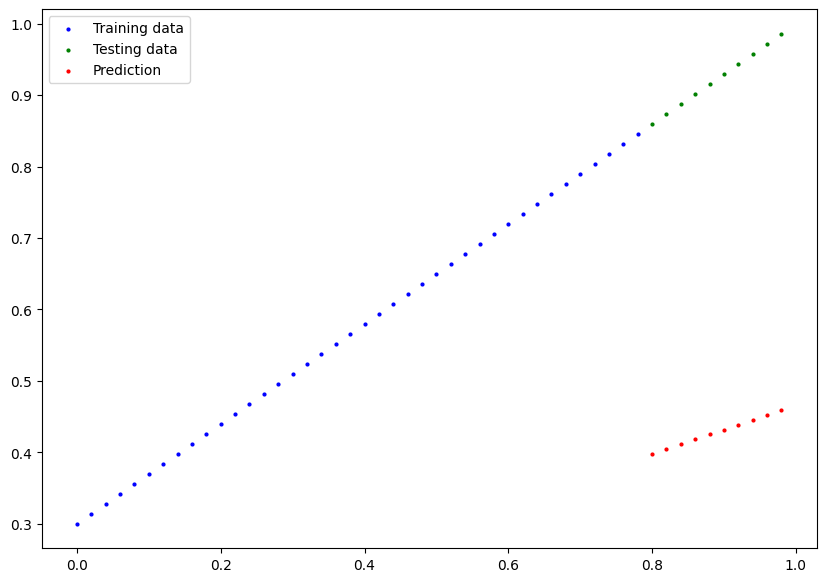

In [397]:
plot_predictions(prediction=y_preds)

### 3.Train model
the whole idea of training is for a model to move from some parameter to another

In [398]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [399]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [400]:
from torch import nn

# Setup a loss function
loss_fn=nn.L1Loss()

# Setup an optimizer(SDG)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### Builing a traing loop in Pytorch

A couple of things we need in a training loop

0.Loop through the data

1.Forward pass to make the prediction propogation

2. Calculate the loss

3. Optimize zero grad

4. Loss backward-move backward through the network to calculate the gradient of each of the parameters the loss

5.Optimizer step use the optimizer to adjust out model parameter to try and improver the loss(gradient descent)

In [401]:

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [465]:
# An epoch is one loop through the data
epochs=1

for epoch in range(epochs):
  #set the model to training mode
  model_0.train()# train mode in Pytroch sets all parameter that require gradient
  #forward pass
  y_preds=model_0(X_train)

  # Calculate the loss
  loss=loss_fn(y_preds,Y_train)
  print(f"Loss: {loss}")
  # Optimizer
  optimizer.zero_grad()
  # Perform backpropagation on the loss with respect to the parameters  of the model
  loss.backward()
  #Step the optimizer
  optimizer.step()

  model_0.eval()#turn off the gradient tracking

  #print ot model state_dict()
  print(model_0.state_dict())

Loss: 0.040631629821272414
OrderedDict({'weights': tensor([0.4992]), 'bias': tensor([0.3828], dtype=torch.float64)})


In [466]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

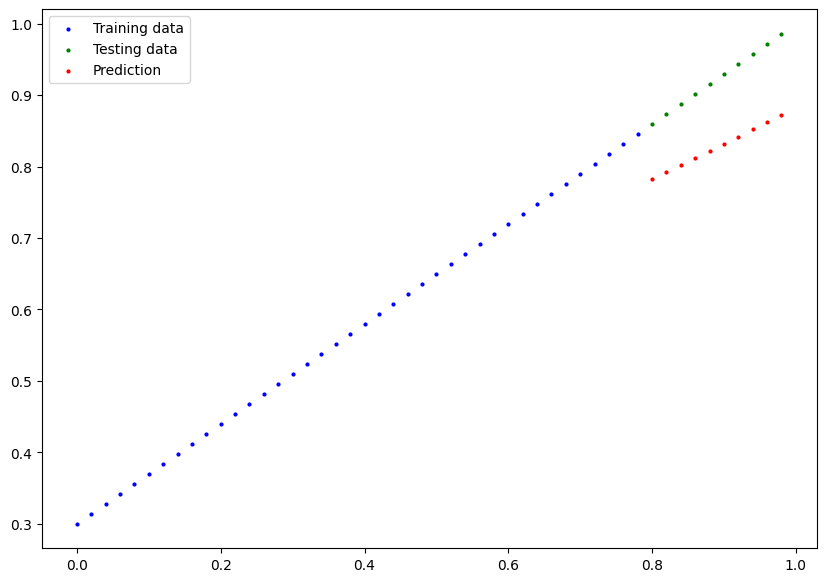

In [468]:
plot_predictions(prediction=y_preds_new)